<br>
# Einblick in das Rechnen mit <i>agla</i>

von Holger Böttcher - hbomat@posteo.de
<br><br>
Diese Arbeit steht unter der freien Lizenz [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.de)  
<br><br>
1.<b> Spiegelungen</b> im Raum<br>
2.<b> Kollinearität / Komplanarität</b> von Vektoren<br>
3.<b></b> Lösung eines <b>Linearen Gleichungssystems</b><br>
4.<b></b> Anwendung von <b>Verfahren</b><br><br>
5.<b> Klassen </b> in <i>agla</i><br>
6.<b> Hilfe-Informationen</b>

<br>
Das Paket <i>agla</i> ist in der Programmiersprache <b>Python</b> geschrieben und basiert
<br>auf dem ebenfalls in Python geschriebenen und quelloffen frei verfügbaren <b>CAS 
<br>SymPy</b> 

Für die geometrischen Objekte wurden Python-Klassen im Sinne der Objekt-
<br>Orientierten-Programmierung implementiert. Damit können entsprechende Python-
<br>Objekte erzeugt werden, mit denen unter Verwendung ihrer Eigenschaften und 
<br>Methoden am Computer gearbeitet wird 

Die Berechnungen werden in einem Jupyter-Notebook (mit englischer 
<br>Bedienoberfläche) durchgeführt; die vorliegende Datei wurde durch den HTML- 
<br>Export eines solchen Notebooks hergestellt
<br><br> 
<div style='color:yellowgreen'>
<i>Die Kommentare (nach #) sind lediglich Erläuterungen und für die Berechnungen</i> 
<br><i>nicht relevant, Analoges trifft auf die Kontrollausgaben zu</i>
<br><br>
</div>

In [1]:
%run agla/start    # Aktivierung des Paketes

In [2]:
# Punkte werden in agla mit ihren Ortsvektoren identifiziert

# v - Kurzform von Vektor

A = v(-3, -2, 6); B = v(2, -2, 5); C = v(1, -3, -4); P = v(2, -8, 3)
A, B, C, P

(Vektor, Vektor, Vektor, Vektor)

In [3]:
g = Gerade(A, v(A, B))   # Erzeugung der Geraden mittels Stütz- und 
                         # Richtungsvektor
g.prg                    # Parametergleichung    

<IPython.core.display.Math object>

In [4]:
g.stütz, g.richt  # Stütz- und Richtungsvektor der Geraden 

(Vektor, Vektor)

In [5]:
e = Ebene(A, v(A, B), v(A, C))   # Erzeugung der Ebene mittels Stütz-  
                                 # und 2 Richtungsvektoren
e.prg    # Parametergleichung

<IPython.core.display.Math object>

In [6]:
e.stütz, e.richt, e.norm,   # Stütz, Richtungs-, Normalenvektor(en) der Ebene 

(Vektor, (Vektor, Vektor), Vektor)

Andere Gleichungen der Ebene

In [7]:
-e.koord   # Koordinatenform

In [8]:
e.nf   # Normalenform

<IPython.core.display.Math object>

In [9]:
e.hnf   # Hesse'sche Normalenform

<IPython.core.display.Math object>

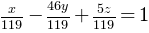

In [10]:
e.aagl   # Achsenabschnittsgleichung

### Spiegelung an der Ebene

Es wird eine Hilfsgerade durch $P$ benutzt, deren Richtungsvektor der Normalenvektor
<br>der Ebene ist

In [11]:
h = Gerade(P, e.norm)   # die Lotgerade von P auf e

h.prg   # Kontrolle

<IPython.core.display.Math object>

In [12]:
F = e.schnitt(h)   # der Lotfußpunkt

In [13]:
Qe = P + 2 * v(P, F)

Qe       # der gesuchte Punkt

Vektor

Kontrolle des Ergebnisses

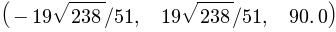

In [14]:
# mittels der Lage der Punkte bezüglich der Ebene

vv = v(P, Qe)

Abstand(P, e), Abstand(Qe, e), Winkel(vv, e)    # Abstände sind hier 
                                                # vorzeichenbehaftet

In [15]:
# mittels des entsprechenden Abbildung-Objektes (die Funktion 
# spiegelung erzeugt ein solches)

Qe.bild(spiegelung(e)), P    # das Bild des Bildes ist wieder das Urbild

(Vektor, Vektor)

In [16]:
# Visuelle Kontrolle

zeichne([e, 'khaki'], P, [F, blau, 2], [Qe, 2, rot], Strecke(P, Qe))

<div style='color:sandybrown'>
<i><b>In vielen Fällen kann eine Ergebniskontrolle durchgeführt werden<br>
</b></i>
</div><br>

Eine 'Makrolösung' wird bereits durch eine einzelne Anweisung geliefert

In [17]:
Qe1 = P.bild(spiegelung(e))
Qe1

Vektor

<div style='color:sandybrown'>
<i><b>Es ist typisch für agla, dass es für viele Probleme solche 'Makrolösungen' gibt<br>
Andererseits hat man mit dem Paket alle Möglichkeiten, um Aufgaben detailliert <br>
durchzurechnen</b></i>
</div>

### Spiegelung an der Geraden 

Es wird eine Hilfsebene durch $P$ benutzt, deren Normalenvektor der Richtungsvektor
<br>der Geraden ist

In [18]:
e1 = Ebene(P, g.richt)   # Erzeugung der Ebene durch Stütz- und 
                         # Normalenvektor

e1.nf   # Kontrollausgabe der Normalenform der Gleichung

<IPython.core.display.Math object>

In [19]:
F = e1.schnitt(g)     # Fußpunkt des Lotes von P auf g
F   

Vektor

In [20]:
Qg = P + 2 * v(P, F)   # der gesuchte Punkt
Qg

Vektor

Kontrolle des Ergebnisses

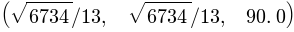

In [21]:
# mittels der Lage der Punkte bezüglich der Geraden

Abstand(P, g), Abstand(Qg, g), Winkel(g, v(P, Qg))

In [22]:
# mit Objekten der Klasse Abbildung

Qg, P.bild(spiegelung(g)), P.bild(drehung(g, 180))   # die Abbildungen 
                                                     # sind gleich

(Vektor, Vektor, Vektor)

In [23]:
# Visuelle Kontrolle   

# Die Bezeichner sind nur für Demonstrationszwecke eingefügt

sicht_box(-12, 12)
d = v(0, -1, 0.5)
zeichne([g, 2],  P, [F, blau, 2], [Qg, 2, rot], Strecke(P, Qg),
        bez=[ (P+d, 'P'),         
              (F+d, 'F'),                 
              (Qg+d, 'Qg'),       
              (g.pkt(3)-d, 'g')] )

<img src='bilder/bild2.png', align='left'><br>

<div style='color:sandybrown'>
<i><b>Grafiken dienen in agla vorrangig der Kontrolle von Rechenergebnissen, <br>
mit ihrer Hilfe können auch Lösungsansätze gesucht werden <br>
</b></i>
</div>


Noch etwas zu Abbildungen:

In [24]:
abb = spiegelung(g)

In [25]:
abb.matrix, abb.versch, abb.matrix.D   # Matrix, Verschiebungsvektor,  
                                       # Determinante der Matrix

⎛⎡ 12             ⎤           ⎞
⎜⎢ ──    0   -5/13⎥, Vektor, 1⎟
⎜⎢ 13             ⎥           ⎟
⎜⎢                ⎥           ⎟
⎜⎢  0    -1    0  ⎥           ⎟
⎜⎢                ⎥           ⎟
⎜⎢           -12  ⎥           ⎟
⎜⎢-5/13  0   ──── ⎥           ⎟
⎝⎣            13  ⎦           ⎠

In [26]:
abb.matrix * P + abb.versch   # so wird in der bild-Methode der 
                              # Punkt Qg ermittelt

Vektor

<br>

## 2. Kollinearität / Komplanarität von Vektoren
<br>

In [27]:
a = v(3, -2, 5); b = v(-1, 0, 4); c = v(9, -4, -2)   # gegeben
a, b, c

(Vektor, Vektor, Vektor)

### Kollinearität von 2 Vektoren

In [28]:
e = a.einh_vekt   # der Einheitsvektor von a

e, a / a.betrag   

(Vektor, Vektor)

In [29]:
kollinear(a, e)   # die Abfrage ergibt Kollinearität

True

In [30]:
kollinear(a, e, d=ja)   # Darstellung von e durch a

<IPython.core.display.Math object>

In [31]:
kollinear(e, a, d=ja)   # Darstellung von a durch e

<IPython.core.display.Math object>

### Komplanarität von 3 Vektoren

In [32]:
komplanar(a, b, c)   # die Abfrage ergibt Komplanarität

True

In [33]:
(a >< b) * c   # das Spatprodukt ist 0;  >< Vektor-, * Skalarprodukt

Linearkombination mit Koeffizienten ungleich Null, die den Nullvektor ergibt

In [34]:
komplanar(a, b, c, l=ja)

<IPython.core.display.Math object>

Darstellung jedes Vektors durch die beiden anderen

In [35]:
a, b, c

(Vektor, Vektor, Vektor)

In [36]:
komplanar(a, b, c, d=ja)   

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Visuelle Darstellung der Komplanarität

In [37]:
zeichne([-2*a, O, rot, 2],        # Zeichnen von -2*a im Ursprung O
        [3*b, -2*a, grün, 2],     # Zeichnen von 3*b im Endpunkt von 
                                  # -2*a
        [c, -2*a + 3*b, blau, 2], # Zeichnen von c im Endpunkt von 
                                  # -2*a+3*b
        box=nein)

<br>

## 3. Lösung eines LGS
<br>
Zur Ermittlung, ob die obigen 3 Vektoren komplanar sind, ist folgende 
<br>Vektorgleichung zu lösen

$\qquad r \,\vec{a} + s \,\vec{b} + t \,\vec{c} = \vec{O}$

Es wird eine nichttriviale Linearkombintion gesucht, die den Nullvektor ergibt 
<br>(die triviale Lösung $\;r = s = t = 0\;$ ist offensichtlich)

Es wird nur der Ausdruck auf der liinken Seite benötigt, 
auf der rechten Seite wird <br>der Nullvektor angenommen:

In [38]:
gleichung = r*a + s*b + t*c   
gleichung

Vektorschar([r, s, t])

Die Funktion <i>löse</i> akzeptiert auch eine Vektorgleichung

In [39]:
löse(gleichung)

Zur Demonstration des Lösungsverfahrens wird ein LGS-Objekt erzeugt und nach 
<br>dem Gauß-Algorithmus gelöst

In [40]:
lgs = LGS(gleichung)

In [41]:
lgs.ausg

    I      3r -  s + 9t = 0
   II     -2r      - 4t = 0
  III      5r + 4s - 2t = 0


*Die Latex-Ausgabe von Gleichungssystemen aus einem Programm heraus klappt <br>
noch nicht, deswegen wird hier eine print-Ausgabe gemacht*

In [42]:
lgs.gauß

                r      s      t
    I           3     -1      9      0
   II          -2      0     -4      0
  III           5      4     -2      0

Überführen in Dreieckform, Schritt 1      II = 2*I+3*II   III = 5*I-3*III
                r      s      t
    I           3     -1      9      0
   II           0     -2      6      0
  III           0    -17     51      0

Überführen in Dreieckform, Schritt 2      III = 17*II-2*III
                r      s      t
    I           3     -1      9      0
   II           0     -2      6      0
  III           0      0      0      0

Es liegt 1 Nullzeile vor, die gestrichen wird

                r      s      t
    I           3     -1      9      0
   II           0     -2      6      0

Berechnen der Lösung durch Rücksubstitution   ( 'von unten nach oben' )

  [II]:        -2s + 6t = 0  ->  s = 3t
in [I]:        3r + 6t = 0  ->  r = -2t


Die Lösung ist


<IPython.core.display.Math object>

oder


<IPython.core.display.Math object>

<br>

## 4. Anwendung von Verfahren

<br>
Es seien

In [43]:
P = v(-2, -3, 1)
g = Gerade(A, v(A,B))
e = Ebene(A, v(A, B), v(A, C))

A, B, C, P   # s.o.

(Vektor, Vektor, Vektor, Vektor)

In [44]:
g.prg

<IPython.core.display.Math object>

In [45]:
e.prg

<IPython.core.display.Math object>

Zur Demonstration der Berechnung des Abstandes des Punktes $P$ von der Geraden 
<br>$g$ kann ein Verfahren benutzt werden

In [46]:
APG(h=1)


AbstandPunktGerade - Verfahren

Abstand eines Punktes von einer Geraden, Version 0 über eine
Hilfsebene mit Normalengleichung

Aufruf     APG( punkt, gerade )

                punkt    Punkt
                gerade   Gerade



In [47]:
APG(P, g)


Abstand eines Punktes von einer Geraden

Gegeben:



<IPython.core.display.Math object>


Bestimmung der Ebene E, die senkrecht zu g ist und P enthält:

     Normalenvektor ist der Richtungsvektor von g, Normalenform ist dann


<IPython.core.display.Math object>


Bestimmung des Schnittpunktes der Geraden mit dieser Ebene:

     Einsetzen der rechten Seite der Geradengleichung in die 
     Normalengleichung


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

     und Auflösen


<IPython.core.display.Math object>

     ergibt nach Einsetzen in die Geradengleichung den Schnittpunkt


<IPython.core.display.Math object>


Der gesuchte Abstand ist der zwischen P unf F


<IPython.core.display.Math object>

<IPython.core.display.Math object>

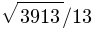

In [48]:
P.abstand(g)   # Vergleich mit dem Ergebnis der abstand-Methode

<br>
Ein anderes Verfahren zeigt die Umwandlung der Parametergleichung der Ebene $e$ 
<br>in die Koordinatenform

In [49]:
EP2K(e)


Bestimmung einer Koordinatenform der Ebenengleichung anhand der Para-
meterform

Gegeben:


<IPython.core.display.Math object>

Das äquivalente Gleichungssystem ist


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elimination der Parameter:

     Eliminieren von r und s aus zwei der drei Gleichungen

     hier werden die 1. und die 2. Geichung benutzt

     Auflösen des LGS nach r und s; die Lösung ist


<IPython.core.display.Math object>

     r und s in die 3. Gleichung einsetzen


<IPython.core.display.Math object>

Koordinatengleichung der Ebene


<IPython.core.display.Math object>

Bei Bedarf können die Brüche beseitigt werden (Multiplikation mit 5)


<IPython.core.display.Math object>

In [50]:
e.koord    # Vergleich mit der koord-Eigenschaft der Ebene

<br>
### Liste der Verfahren
<br>
Unten sind alle implementierten Verfahren aufgeführt, die die detaillierten
<br>Berechnungen anhand der Daten des Anwenders demonstrieren

In [51]:
Hilfe(h=12)

		
Verfahren
		
Verfahren sind für wiederkehrende Aufgaben im Raum R^3 vorgesehen und
sollen den Lernvorgang direkt unterstützen

Die Verfahren brauchen nicht weiter erläutert zu werden, sie werden
mit einem einprägsamen Kurznamen aktiviert, der auch ihren Inhalt cha-
rakterisiert

Zu ihrem Gebrauch wird empfohlen, die entsprechende Hilfeseite einzuse-
hen, etwa mit

   In [..]: AGG(h=1)
		
Es sind folgende Verfahren implementiert:
	
AEE  Abstand-Ebene-Ebene			   
AGE  Abstand-Gerade-Ebene			
AGG  Abstand-Gerade-Gerade  Version 0		  
AGG1                     ...Version 1		  
AGG2                     ...Version 2		  
APE  Abstand-Punkt-Ebene    Version 0		   
APE1                     ...Version 1		   
APE2                     ...Version 2		   
APG  Abstand-Punkt-Gerade   Version 0  			
APG1                     ...Version 1  		  		
APG2                     ...Version 2  		   		
APG3                     ...Version 3  		   		
APP  Abstand-Punkt-Punkt	
LEE  Lage-Ebene-Ebene			              

<div style='color:sandybrown'>
<i><b>Der Schwierigkeitsgrad zur Ergänzug dieser Liste durch die Entwicklung <br>weiterer 
Verfahren ist (bei Erfahrungen mit agla) nicht sehr hoch <br>
</b></i>
</div><br>

## 5. Klassen in <i>agla</i>


In [52]:
Hilfe(h=6)

		
Klassen im Raum R^3
		
Vektor  / = Punkt
Gerade
Ebene
Kugel
Parallelogramm  / = ParGramm
Spat
Strecke		
Dreieck		
Viereck
Kreis
Pyramide
Prisma
Kegel
Zylinder
Körper		
Matrix		
Abbildung
Kurve
Fläche2terOrdnung  / = F2O
Fläche

Punkte werden mit ihren Ortsvektoren identifiziert		
        


In [53]:
Hilfe(h=7)

		
Klassen in der Ebene R^2
		
Vektor  / = Punkt
Gerade
Parallelogramm  / = ParGramm
Strecke		
Dreieck		
Viereck
Figur
Kreis
Matrix		
Abbildung
Ellipse
Hyperbel
Parabel		
Kurve2terOrdnung  / = KegelSchnitt / = K2O
Kurve

Punkte werden mit ihren Ortsvektoren identifiziert		
        


In [54]:
Hilfe(h=8)

		
Andere Klassen
		
Vektor  / = Punkt  (Komponentenanzahl > 3)
Matrix (Zeilenanzahl > 3)
LinearesGleichungssystem  / = LGS
Gleichung

Klassen der sphärischen Geometrie		
sPunkt		
sGerade
sStrecke
sDreieck
sZweieck		
sKreis

Klassen der hyperbolischen Geometrie
hPunkt
hGerade
hStrahl
hStrecke		
hDreieck
hKreis		
        


## 6. Hilfe-Informationen

<i>agla</i> verfügt über ein eingebautes Hilfesystem

Hilfethemen können mit <i>Hilfe(...)</i> abgefragt werden<br> 

Hilfe zur Erzeugung von Objekten kann jederzeit erhalten werden, indem in der 
<br>Erzeugerfunktion des Objektes als letztes Argument <i>h = 1</i> angegeben wird, etwa

<i>$\qquad$Gerade(A, v(A, B), h=1)</i>

Das gilt auch für alle Funktions- und Methodenaufrufe

Zu einem existierenden Objekt sind die Namen seiner Eigenschaften und Methoden 
<br>über die <i>h</i>-Eigenschaft erhältlich, etwa 

In [55]:
P.h


Eigenschaften und Methoden (M) für Vektoren im Raum R^3 und
in der Ebene R^2

vek.hilfe                Bezeichner der Eigenschaften und Methoden
vek.abstand(...)      M  Abstand zu anderen Objekten
vek.betrag               Betrag
vek.betrag_(...)      M  ebenso, zugehörige Methode
vek.bild(...)         M  Bild bei einer Abbildung
vek.d                    Ableitungsvektor (eine Variable)
vek.dez                  Dezimaldarstellung
vek.dez_(...)         M  ebenso, zugehörige Methode
vek.diff(...)         M  Ableitungsvektor (mehr als eine Variable)
vek.dim                  Dimension (Anzahl Komponenten)
vek.einfach              Vereinfachung eines Vektors
vek.einh_vekt            Einheitsvektor
vek.is_schar             Test auf Schar
vek.kette(...)        M  Verketten zu einer Matrix
vek.kollinear(...)    M  Kollinearität von Vektoren/Punkten
vek.komp                 Komponenten
vek.komplanar(...)    M  Komplanarität von Vektoren/Punkten (nur im Raum R^3)
vek.koord                Koordi

oder

In [56]:
e.h


Eigenschaften und Methoden (M) für Ebene

e.hilfe             Bezeichner der Eigenschaften und Methoden
e.aagl              Achsenabschnittsgleichung
e.abstand(...)   M  Abstand zu anderen Objekten
e.auf_pkt           = e.stütz (Aufpunkt)
e.bild(...)      M  Bild bei einer Abbildung
e.dim               Dimension
e.hnf               Hessesche Normalenform
e.is_schar          Test auf Schar
e.koord             Koordinatengleichung
e.koord_(...)    M  ebenso, zugehörige Methode
e.nf                Normalenform der Gleichung
e.nf_(...)       M  ebenso, zugehörige Methode
e.norm              Normalenvektor
e.par               Parameter in der Parametergleichung
e.parallele(...) M  parallele Ebene
e.pkt(...)       M  Ebenenpunkt
e.prg               Parametergleichung
e.prg_(...)      M  ebenso, zugehörige Methode
e.punkte            Drei Punkte der Ebene
e.punkte_(...)   M  ebenso, zugehörige Methode
e.richt             Richtungs- (Spann-)vektoren
e.sch_el(...)    M  Element einer Schar
e.s

<div style='color:sandybrown'>
<i><b>Es ist einfach, einer existierenden Klasse oder einer Eigenschaft / Methode <br>
bzw. Funktion einen neuen Namen zu geben oder einen weiteren Namen für<br>sie hinzuzufügen<br><br>
Die Funktionalität von agla ist auch in anderer Hinsicht, z.B. zum Erstellen <br>
einer zusätzlichen Methode für eine Klasse, relativ einfach erweiterbar 
</b></i>
</div><br><br>